<a href="https://colab.research.google.com/github/van-dang/MRI-Cloud/blob/master/Manifolds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the code

In [0]:
# This program solves the Bloch-Torrey equation applied to computational diffusion MRI using 
# the finite element method coupled with the theta-method for the spatial discretization.

# The scope of usage: 
# (1) Single domains, Multilayered structures, manifolds
# (2) Membrane permeability for internal interfaces
#     Artificial permeability at the external interfaces
# (3) pure homogeneous Neumann BCs, (4) pseudo-periodic BCs

# Copyright (C) 2019 Van-Dang Nguyen (vdnguyen@kth.se)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2017-10-10
# Last changed: 2019-04-25

# This demo is maintained by Van-Dang Nguyen
# Please report possible problems to vdnguyen@kth.se

# Setting a working environment with FEniCS

In [0]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *

gmsh_dir=!which gmsh
if len(gmsh_dir)==0:
  !apt-get install gmsh
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

import sympy as sp


clear_output()

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

# Disable warnings
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("rothemain.rothe_utils")
logging.getLogger('UFL').setLevel(logging.WARNING)
logging.getLogger('FFC').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")


E: Package 'python-software-properties' has no installation candidate
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/fenics-packages/fenics/ubuntu bionic InRelease [15.4 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:14 htt

#Load pre-defined functions

In [0]:
import sympy as sp  
exists = os.path.isfile('DmriFemBuitInFunc.py')
isupdate = False
if (exists==False or isupdate==True):
    if isupdate==True:
        !rm DmriFemBuitInFunc.py
    print("Load pre-defined functions from GitHub")
    !wget --quiet https://raw.githubusercontent.com/van-dang/MRI-Cloud/master/DmriFemBuitInFunc.py
from DmriFemBuitInFunc import *

Load pre-defined functions from GitHub


# Working on the mesh

In [0]:
# mesh_file = "fru_M_100383_3D.xml"
mesh_file = "fru_M_100383_1D.xml"
mesh_file_exists = os.path.isfile(mesh_file)
if (mesh_file_exists==False):
    !wget https://raw.githubusercontent.com/van-dang/MRI-Cloud/mesh/$mesh_file''.zip
    !unzip -q $mesh_file''.zip
mymesh = Mesh(mesh_file);

04b_pyramidal6aFI
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 89325 vertices
Found all vertices
Expecting 343506 cells
Found all cells
Conversion done
Topological dimension:  3
Geometrical dimension:  3
Mesh size: #vertices: 89325, #elements: 343506


# Solve the Bloch-Torrey equation

Function Space for Single Domains has 2 components
(ur, ui): r-real, i-imaginary
Initialize a standard function space.
t:   0.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 0.00%
t: 200.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 0.37%
t: 400.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 0.74%
t: 600.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 1.11%
t: 800.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 1.48%
t: 1000.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 1.86%
t: 1200.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 2.23%
t: 1400.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 2.60%
t: 1600.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 2.97%
t: 1800.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 3.34%
t: 2000.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 3.71%
t: 2200.00  T: 53700.00 dt: 200.0 gnorm: 1.499786e-05 Completed 4.08%
t: 2400.00  T: 53700.00 dt: 200.0 gnorm: 1.499

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


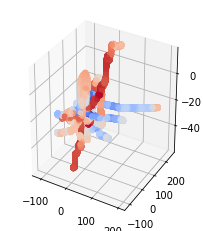

In [0]:
mri_simu = MRI_simulation()
mri_para = MRI_parameters()

#################################################################################
#########################  Pre-defined parameters ###############################
mri_para.stype='PGSE'                                # sequence type
mri_para.bvalue = 1000;                              # bvalue
mri_para.delta, mri_para.Delta = 10600, 43100        # time sequence
mri_para.set_gradient_dir(mymesh, 1, 0, 0)           # gradient direction

mri_para.T = mri_para.Delta+mri_para.delta
mri_para.fs_sym = sp.Piecewise(
                (  1., mri_para.s < mri_para.delta ),
                (  0., mri_para.s < mri_para.Delta ),
                ( -1., mri_para.s < mri_para.T ),
                (  0., True )  
            ) 


mri_para.Apply()
mri_simu.k = 200;                                    # time-step size
mri_simu.nskip = 1;                                  # frequency to print ouputs
mydomain = MyDomain(mymesh, mri_para)
mydomain.phase = None
mydomain.PeriodicDir = [0, 0, 0];             # Direction of the periodicity
mydomain.IsDomainPeriodic = False             # Confirm if the mesh if periodic
mydomain.IsDomainMultiple = False             # Confirm if the mesh is multiple
################################################################################
mydomain.Apply()   # Call Apply before setting the diffusion tensor
################################################################################
# Impose the diffusion coefficient
mydomain.D0 = 3e-3
mydomain.D = mydomain.D0;
#################################################################################

# linsolver = PETScLUSolver("mumps")
linsolver = KrylovSolver("bicgstab")

mri_simu.solve(mydomain, mri_para, linsolver)

Post_processing(mydomain, mri_para, mri_simu, plt)